In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings('ignore')
import pickle

# Data Handling

In [33]:
# load the csv data file into a pandas dataframe and convert class into numerical data
df = pd.read_csv("data/star_classification.csv")
df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

In [34]:
# display first few values of the data
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


## Exploratory Data Analysis

In [35]:
# get statistics about dataset
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.595160,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.787509,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,0.000000,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.000000,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.000000,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,1.000000,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,2.000000,7.011245,12547.000000,58932.000000,1000.000000


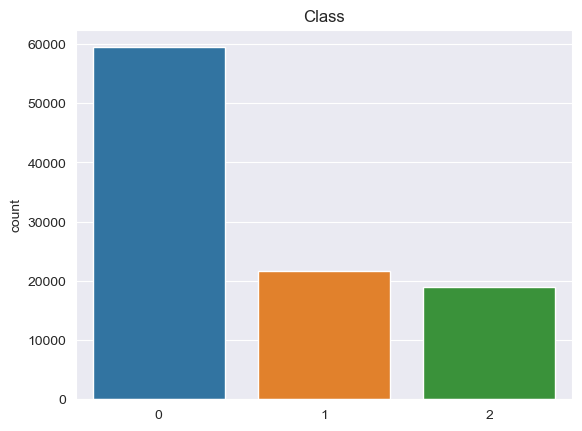

In [36]:
# visualize distribution of target column
sns.countplot(df.loc[:, "class"].values)
plt.title("Class")
plt.show()

# Data Preprocessing

## Dealing with duplicates & irrelevant observations

In [37]:
# remove duplicates and verify
df = df.drop_duplicates()
df[df.duplicated()]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [38]:
# check for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [39]:
# create a classifier to detect anomalies in the dataset
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

In [40]:
# create index to filter outlier based on a threshold
filter_outlier = outlier_score["score"] < -1.5
outlier_index = outlier_score[filter_outlier].index.tolist()
len(outlier_index)

15256

In [41]:
# drop outliers from dataframe
df.drop(outlier_index, inplace=True)
# df.reset_index(inplace = True)
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,2,0.586455,11069,58456,113


## Feature Selection

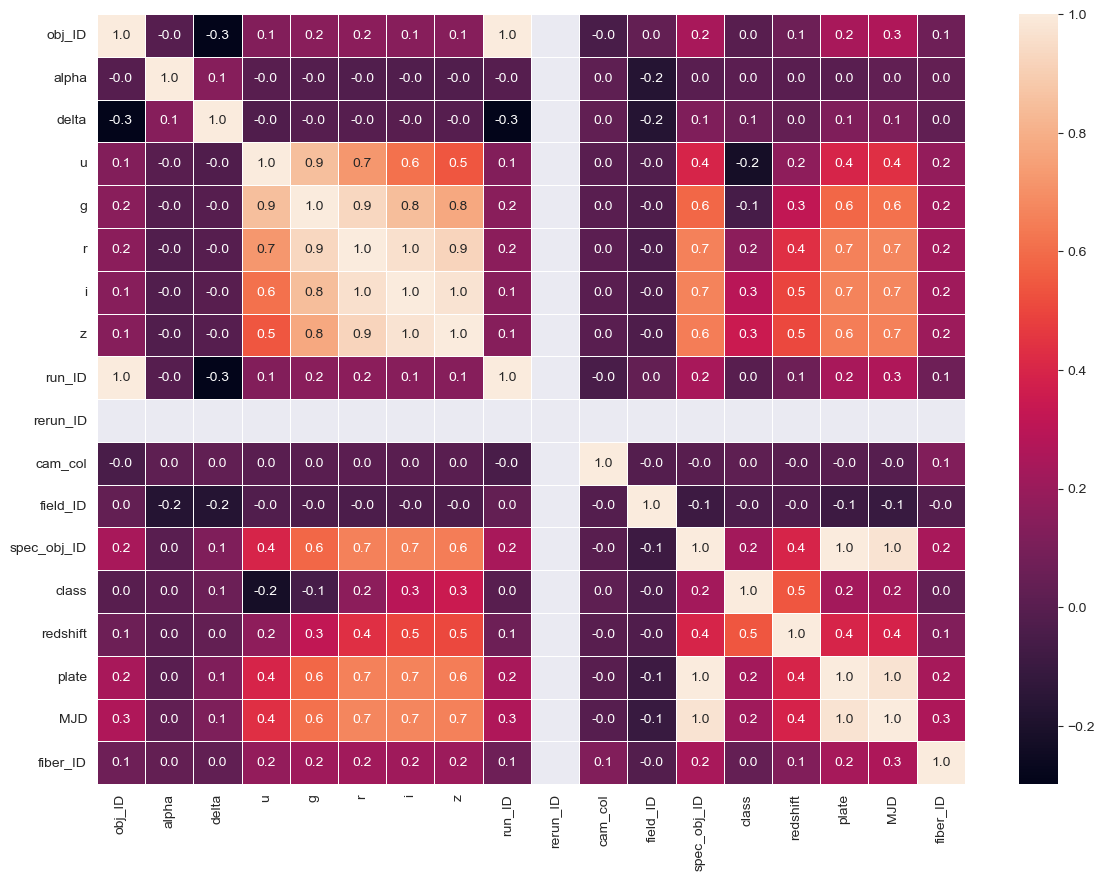

In [42]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot=True, fmt= ".1f", linewidths= .7)
plt.show()

In [43]:
# check correlation between values and the resulting class
correlation = df.corr()
correlation["class"].sort_values()

u             -0.222756
g             -0.058155
field_ID      -0.037529
run_ID         0.000245
obj_ID         0.000247
alpha          0.008183
cam_col        0.017749
fiber_ID       0.037349
delta          0.058952
r              0.160680
MJD            0.214441
spec_obj_ID    0.224728
plate          0.224729
i              0.294096
z              0.349730
redshift       0.541684
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [44]:
# therefore we can drop the columns that do not have a positive/negative (between -0.5 and 0.5) or a NaN correlation with the class column
df.drop(["field_ID", "run_ID", "obj_ID", "alpha", "cam_col", "fiber_ID", "delta", "rerun_ID"], axis=1, inplace=True)

In [45]:
df.head()

,u,g,r,i,z,spec_obj_ID,class,redshift,plate,MJD
0,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,0,0.634794,5812,56354
1,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,0,0.779136,10445,58158
3,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,0,0.932346,9149,58039
4,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,0,0.116123,6121,56187
6,21.46973,21.17624,20.92829,20.60826,20.42573,1.246262e+19,2,0.586455,11069,58456


## Data Imbalance

In [46]:
# assign x as the df without the class column, and y as the value of the class column.
x = df.drop(["class"], axis = 1)
y = df.loc[:, "class"].values

In [47]:
# correct data imbalances by using SMOTE technique to duplicate values and fit_resample to resample minority classes.
sm = SMOTE(random_state = 39)
print("Original Dataset Shape %s" % Counter(y))
x, y = sm.fit_resample(x, y)
print("Resampled Dataset Shape %s" % Counter(y))

Original Dataset Shape Counter({0: 50696, 1: 17890, 2: 16158})
Resampled Dataset Shape Counter({0: 50696, 2: 50696, 1: 50696})


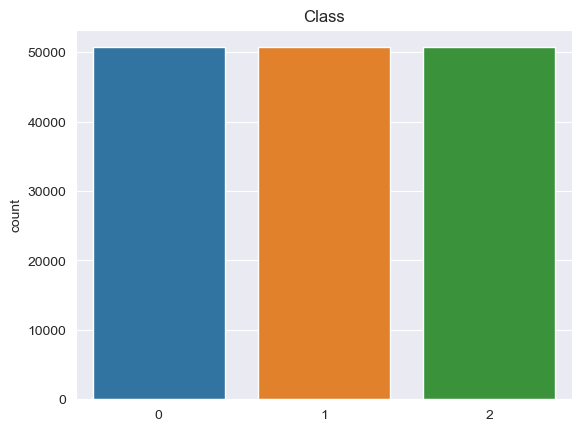

In [48]:
# plot of classes after resampling.
sns.countplot(y)
plt.title("Class")
plt.show()

## PCA

In [49]:
# standardize the 'x' dataset by removing the mean and scaling to unit variance.
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [53]:
# performs (PCA) on the 'x' dataset, selects the top 4 principal components, and combines them with the 'y' dataset, creating a final dataset 'final_DF'.
y = pd.DataFrame(y, columns=["class"])
# pca = PCA(0.95) otherwise causing a bug which 95 percentage takes first 5 columns
pca = PCA(n_components=4)
p_Components = pca.fit_transform(x)
p_DF = pd.DataFrame(data= p_Components, columns= ["Principal Components 1", "Principle Components 2", "Principal Components 3", "Principal Components 4"])
final_DF = pd.concat([p_DF, y[["class"]]], axis=1)
final_DF

,Principal Components 1,Principle Components 2,Principal Components 3,Principal Components 4,class
0,-0.883760,-0.610128,-0.741976,-0.712579,0
1,-4.015936,0.117776,-0.926752,0.067478,0
2,-2.726679,0.536000,-0.658118,-0.209193,0
3,2.879574,2.372304,-0.921510,-0.790939,0
4,-2.698155,1.773602,-0.753032,0.555378,2
...,...,...,...,...,...
152083,-2.319806,-0.569335,0.087152,0.351870,2
152084,-1.501721,0.348722,1.245516,-0.079903,2
152085,-0.896792,1.361279,0.798018,0.117548,2
152086,-2.351540,1.325487,1.648124,-0.558974,2


## Train & Test Data Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(p_DF, y, test_size= 0.33, random_state=42)
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (101898, 4)
x_test: (50190, 4)
y_train: (101898, 1)
y_test: (50190, 1)


# Modelling

In [34]:
# function to evaluate the models
def evaluate(pred):
    print(f"Accuracy: {accuracy_score(y_test, pred)}\n")
    print(f"Classification Report: \n{classification_report(y_test, pred)}\n")
    cm = confusion_matrix(y_test, pred)
    # print(f"Confusion Matrix: \n{cm}\n")
    class_names = ['GALAXY','STAR','QSO']
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names,)
    plt.xlabel('Predicted label', fontsize=14)
    plt.ylabel('True label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

## Random Forest

Fitting Random Forest with default parameters

n_estimators=100,
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features='auto',
max_leaf_nodes=None,
min_impurity_decrease=0.0,
bootstrap=True,
oob_score=False,
n_jobs=None,
random_state=None,
verbose=0,
warm_start=False,
class_weight=None,
ccp_alpha=0.0,
max_samples=None

In [23]:
rf_model = RandomForestClassifier(random_state=123456)

In [24]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=123456)

In [26]:
rf_predicted = rf_model.predict(x_test)

### Accuracy and report of RF with default parameters

Accuracy: 0.8526399681211396

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.82      0.80     16641
           1       0.83      0.78      0.80     16766
           2       0.97      0.95      0.96     16783

    accuracy                           0.85     50190
   macro avg       0.85      0.85      0.85     50190
weighted avg       0.85      0.85      0.85     50190




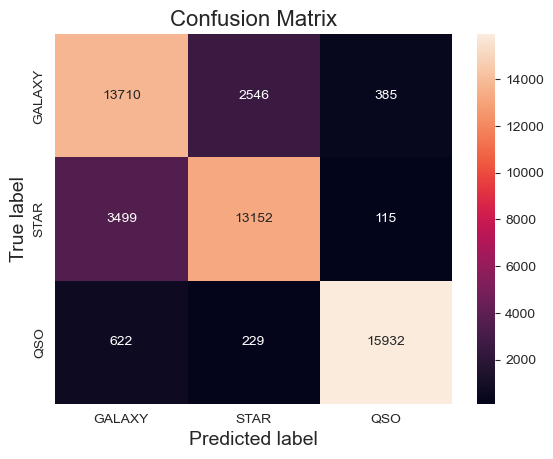

In [35]:
evaluate(rf_predicted)

### RF with Hyper-Parameter Optimization

Default RF parameters

n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None,

In [ ]:
# param = {
#     'n_estimators': [25, 50, 100, 150],
#     'criterion' : ['gini', 'entropy'],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
#         }
# rf_grid_search = GridSearchCV(estimator = rf_model, param_grid = param, cv=5)

In [ ]:
# rf_grid_search.fit(x_train, y_train) #KeyboardInterrupted

since the model has taken significant amount of time to train again with tuning, considering randomized iterations below

In [ ]:
# rf_random_search = RandomizedSearchCV(estimator=rf_model,param_distributions=param, cv=5, n_iter=2,random_state=6)

In [ ]:
# rf_random_search.fit(x_train, y_train)

In [ ]:
# rf_random_search.best_score_

In this case Hyper-Parameter Tuning doesn't work and default parameters are considered to be the best

## LR Model

In [36]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [37]:
lr_predicted = lr.predict(x_test)
lr_predicted

array([0, 1, 0, ..., 0, 2, 1], dtype=int64)

Accuracy: 0.6925682406853955

Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.56      0.55     16641
           1       0.59      0.58      0.58     16766
           2       0.94      0.94      0.94     16783

    accuracy                           0.69     50190
   macro avg       0.69      0.69      0.69     50190
weighted avg       0.69      0.69      0.69     50190




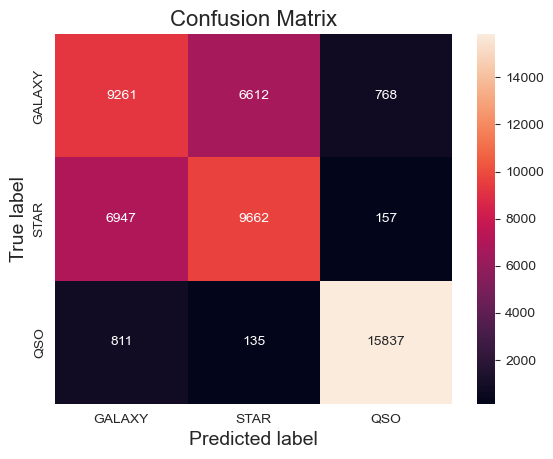

In [38]:
# Evaluate Model
evaluate(lr_predicted)

### Hyper-tuning

In [39]:
# hyper-tuning
# params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
# grid_search = GridSearchCV(lr, param_grid=params, cv=5)
# grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [40]:
# print("Best hyperparameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best score:  0.6901803271575769


Testing set score:  0.6925682406853955
Accuracy: 0.6925682406853955

Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.56      0.55     16641
           1       0.59      0.58      0.58     16766
           2       0.94      0.94      0.94     16783

    accuracy                           0.69     50190
   macro avg       0.69      0.69      0.69     50190
weighted avg       0.69      0.69      0.69     50190




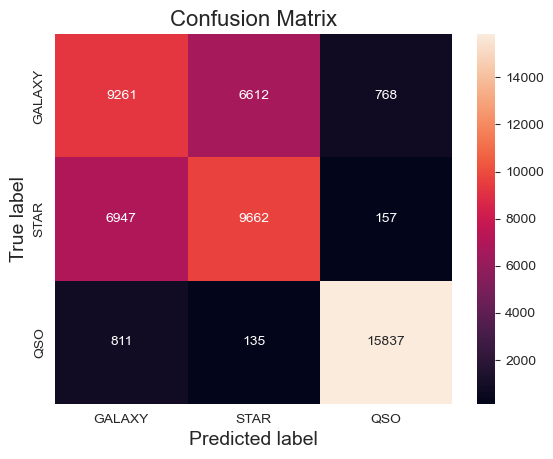

In [42]:
# Evaluate the performance of the best model on the testing set
# best_lr = LogisticRegression(**grid_search.best_params_)
# best_lr.fit(x_train, y_train)
# best_lr_pred = best_lr.predict(x_test)
# evaluate(best_lr_pred)

Even with hyper-tuning the performance of the LR model remains stagnant around 69% for all 3 evaluation criteria, so we will stick with the default parameters going forward.

## Support Vector Machine (SVM) Model

In [43]:
svm = SVC(kernel="rbf", C=4)
svm.fit(x_train, y_train)

SVC(C=4)

Accuracy: 0.8217373978880255

Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.82      0.76     16641
           1       0.80      0.70      0.75     16766
           2       0.97      0.94      0.96     16783

    accuracy                           0.82     50190
   macro avg       0.83      0.82      0.82     50190
weighted avg       0.83      0.82      0.82     50190




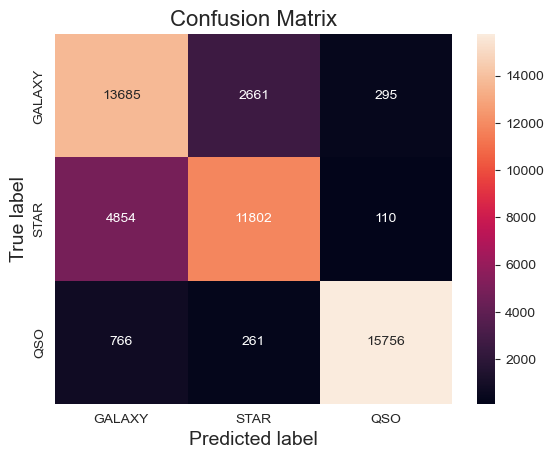

In [44]:
svm_pred = svm.predict(x_test)
evaluate(svm_pred)

# Ensemble Modelling

Since the models have similar performances, we will use a voting classifier to combine their predictions

In [45]:
# define estimators to be used in ensemble model
estimators = [("lr", lr), ("svm", svm), ("rf", rf_model)]

In [52]:
# create a voting classifier, with hard voting strategy and fit it to the data
ensm = VotingClassifier(estimators, voting='hard')
ensm.fit(x_train, y_train)
ensm_pred = ensm.predict(x_test)

In [53]:
ensemble_pred = ensm.predict(x_test)

Accuracy: 0.8293684000796971

Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.82      0.77     16641
           1       0.81      0.72      0.77     16766
           2       0.97      0.94      0.96     16783

    accuracy                           0.83     50190
   macro avg       0.83      0.83      0.83     50190
weighted avg       0.84      0.83      0.83     50190




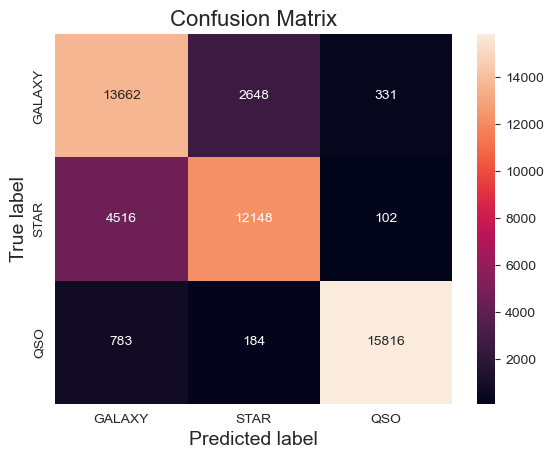

In [54]:
# print evaluation metrics
evaluate(ensm_pred)

## Exporting the model

In [56]:
# export the ensemble model as a pickle file
file_path = "data/model.pkl"
with open(file_path, "wb") as f:
    pickle.dump(ensm, f)

In [51]:
# export the scaler
scaler_path = "data/scaler.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

In [54]:
# export PCA
pca_path = "data/pca.pkl"
with open(pca_path, "wb") as f:
    pickle.dump(pca, f)

### testing user predictions

In [2]:
model = pickle.load(open("data/model.pkl", "rb"))

In [65]:
new_data = pd.DataFrame({'u': [19.5],
                         'g': [18.2],
                         'r': [17.8],
                         'i': [17.4],
                         'z': [16.9],
                         'spec_obj_id': [123456],
                         'redshift': [0.1],
                         'plate': [123],
                         'mjd': [56789]})

In [66]:
scaler = pickle.load(open("data/scaler.pkl", "rb"))
pca = pickle.load(open("data/pca.pkl", "rb"))

new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

In [67]:
prediction = model.predict(new_data_pca)

In [68]:
print(prediction[0])

1
